# 📝 Text super-resolution
* team name and members: Super-girls, **Agata Żywot 148258, Zuzanna Gawrysiak 148255**
* selected problem and dataset: Super-resolution, [TextZoom](https://paperswithcode.com/dataset/textzoom)

In [4]:
import cv2
import PIL
import numpy as np
from IPython.display import display
import sys
if '../' not in sys.path:
    sys.path.append('../')
import random

import torch
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# why is there 2 in the filename?
from src.mdb_to_jpg2 import mdb_to_jpg
from src.utils import imshow
from src.data import get_data_from_dir

Using torch 1.12.1


In [11]:
torch.manual_seed(8)
random.seed(8)

if torch.cuda.is_available():
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    device = torch.device("cuda") 
else:
    device = torch.device("cpu")

print(f"Using torch { torch.__version__} on {device}")

Using torch 1.12.1 on cuda


## Dataset

### Description
TODO

In [13]:
# TODO change for train1 at the end since it's > 10000
data_path = 'data/TextZoom/train2_img/'
lmdb_file = 'data/TextZoom/train2'
N = mdb_to_jpg(data_path, lmdb_file)

Number of samples: 2794


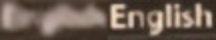

In [7]:
# DISPLAY EXEMPLARY IMAGES
def show_LR_HR_images(imgLR, imgHR): # move to src/data?
    if imgHR.shape == imgLR.shape:
        imshow(cv2.resize(np.concatenate([imgLR, imgHR], 1), None, fx=2, fy=2))
    else:
        imshow(cv2.resize(imgLR, None, fx=2, fy=2))
        imshow(cv2.resize(imgHR, None, fx=2, fy=2))

x = 10
imgHR = cv2.imread(data_path+str(x)+'_img_HR.jpg', 1)
imgLR = cv2.imread(data_path+str(x)+'_img_LR.jpg', 1)
show_LR_HR_images(imgLR, imgHR)


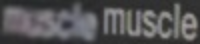

In [9]:
# GET HR AND LR images
data = get_data_from_dir(data_path, [str(i) for i in range(1, N+1)])
x = 1234
show_LR_HR_images(data[x][0], data[x][1])

## Models

In [10]:
# train i koniec :))
BATCH_SIZE = 32

train_loader = torch.utils.data.DataLoader(data, batch_size=BATCH_SIZE)
# test_loader = torch.utils.data.DataLoader(test_data, batch_size=BATCH_SIZE)